In [120]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [121]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [122]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, distinct

In [123]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [124]:
# reflect an existing database into a new model
Base=automap_base()
# reflect the tables
Base.prepare(engine)

In [125]:
# View all of the classes that automap found
print(Base.classes.keys())

['measurement', 'station']


In [126]:
# Save references to each table
Station=Base.classes.station
Measurement=Base.classes.measurement

In [127]:
# Create our session (link) from Python to the DB
session=Session(engine)

# Exploratory Precipitation Analysis

In [128]:
# Find the most recent date in the data set.
most_recent_date=session.query(func.max(Measurement.date)).scalar()
most_recent_date

'2017-08-23'

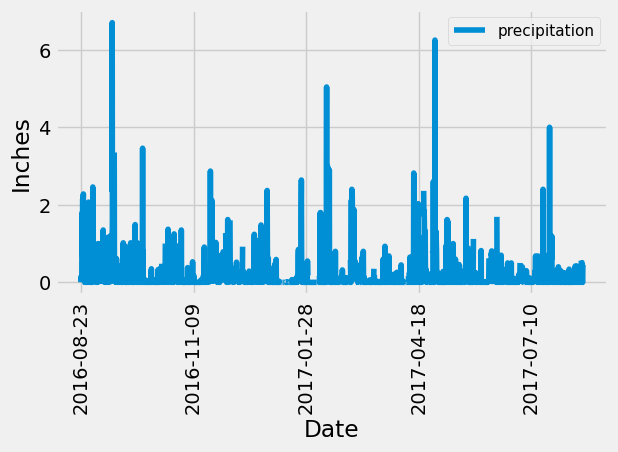

In [129]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent_date

# Calculate the date one year from the last date in data set.
year, month, day = most_recent_date.split('-')
one_year_ago = f"{int(year) - 1}-{month}-{day}"

# Perform a query to retrieve the data and precipitation scores
results = session.query(Measurement.date, Measurement.prcp).filter(
    Measurement.date >= func.date(most_recent_date, '-1 year')
).order_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
df = pd.DataFrame(results, columns=['date', 'prcp'])

# Sort the dataframe by date
df_sorted = df.sort_values(by='date')

# Use Pandas Plotting with Matplotlib to plot the data
df_sorted.plot(x='date', y='prcp', kind='line',label='precipitation')
plt.xlabel('Date')
plt.ylabel('Inches')
plt.xticks(rotation=90) 
plt.legend(loc='upper right',fontsize=11)
plt.tight_layout()
plt.show()


In [138]:
# Use Pandas to calculate the summary statistics for the precipitation data
summary_stats_df = pd.DataFrame(df_sorted['prcp'].describe())
summary_stats_df.columns = ['precipitation']
summary_stats_df

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [137]:
# Design a query to calculate the total number of stations in the dataset
total_stations = session.query(func.count(Station.station)).scalar()
total_stations

9

In [151]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_active_stations = session.query(
    Measurement.station, 
    func.count(Measurement.station).label('observation_count')
).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

most_active_stations
# for station, count in most_active_stations:
#     print(f"{station},{count}")

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [153]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.



Text(0.5, 4.183333333333314, 'Temperature')

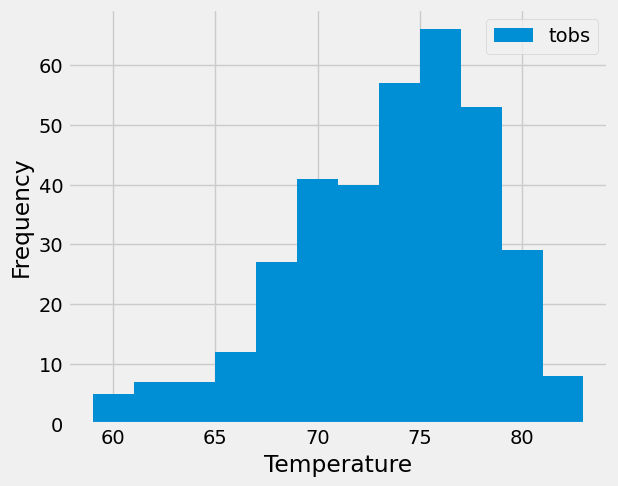

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


# Close Session

In [16]:
# Close Session
session.close()